In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
train_df = pd.read_csv("../data/train.csv")
val_df = pd.read_csv("../data/validation.csv")
test_df = pd.read_csv("../data/test.csv")

### Evaluating Naive Bayes on Validation Data

In [11]:
BNB = make_pipeline(CountVectorizer(analyzer='word', ngram_range=(1, 2), binary=True), BernoulliNB())
BNB.fit(train_df["Stemmed"], train_df["Result_Bin"])

# Predict on the test set
y_pred = BNB.predict(val_df["Stemmed"])
y_val = val_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_val, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_val, y_pred)
print("Precision:", round(precision, 3))
# Calculate recall
recall = recall_score(y_val, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.714
Precision: 0.574
Recall: 0.943


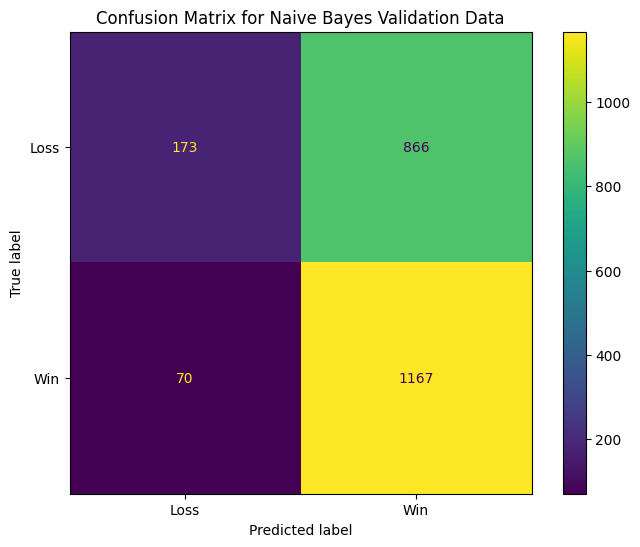

In [10]:
conf_matrix = confusion_matrix(y_val, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss","Win"])
fig, ax = plt.subplots(figsize=(8, 6))  # You can specify the size of the figure here
cm_display.plot(ax=ax)

# Set the title
ax.set_title("Confusion Matrix for Naive Bayes Validation Data")

plt.savefig("nbv_confusion_matrix.pdf", format='pdf')

# Optionally show the plot in the notebook
plt.show()

### Evaluating Naive Bayes on Testing Data

In [12]:
# Predict on the test set
y_pred = BNB.predict(test_df["Stemmed"])
y_test = test_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision, 3))
# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.717
Precision: 0.574
Recall: 0.953


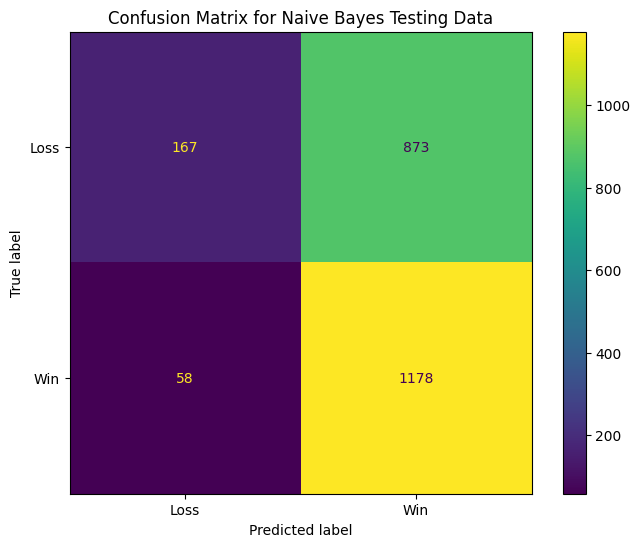

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss", "Win"])
fig, ax = plt.subplots(figsize=(8, 6))  # You can specify the size of the figure here
cm_display.plot(ax=ax)

# Set the title
ax.set_title("Confusion Matrix for Naive Bayes Testing Data")

plt.savefig("nbt_confusion_matrix.pdf", format='pdf')

# Optionally show the plot in the notebook
plt.show()

In [15]:
test_result = test_df.copy()
test_result["Predicted_Result"] = y_pred
test_result["Predicted_Probability"] = BNB.predict_proba(test_df["Stemmed"])[:, 1]
test_result.to_csv("bnb_results.csv")